## Exploratory Data Analysis:

Exploratory Data Analysis (EDA) refers to the method of studying and exploring record sets to apprehend their predominant traits, discover patterns, locate outliers, and identify relationships between variables. EDA is normally carried out as a preliminary step before undertaking extra formal statistical analyses or modeling.

## EDA Student Performance Indicator

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 3) Dataset Information
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

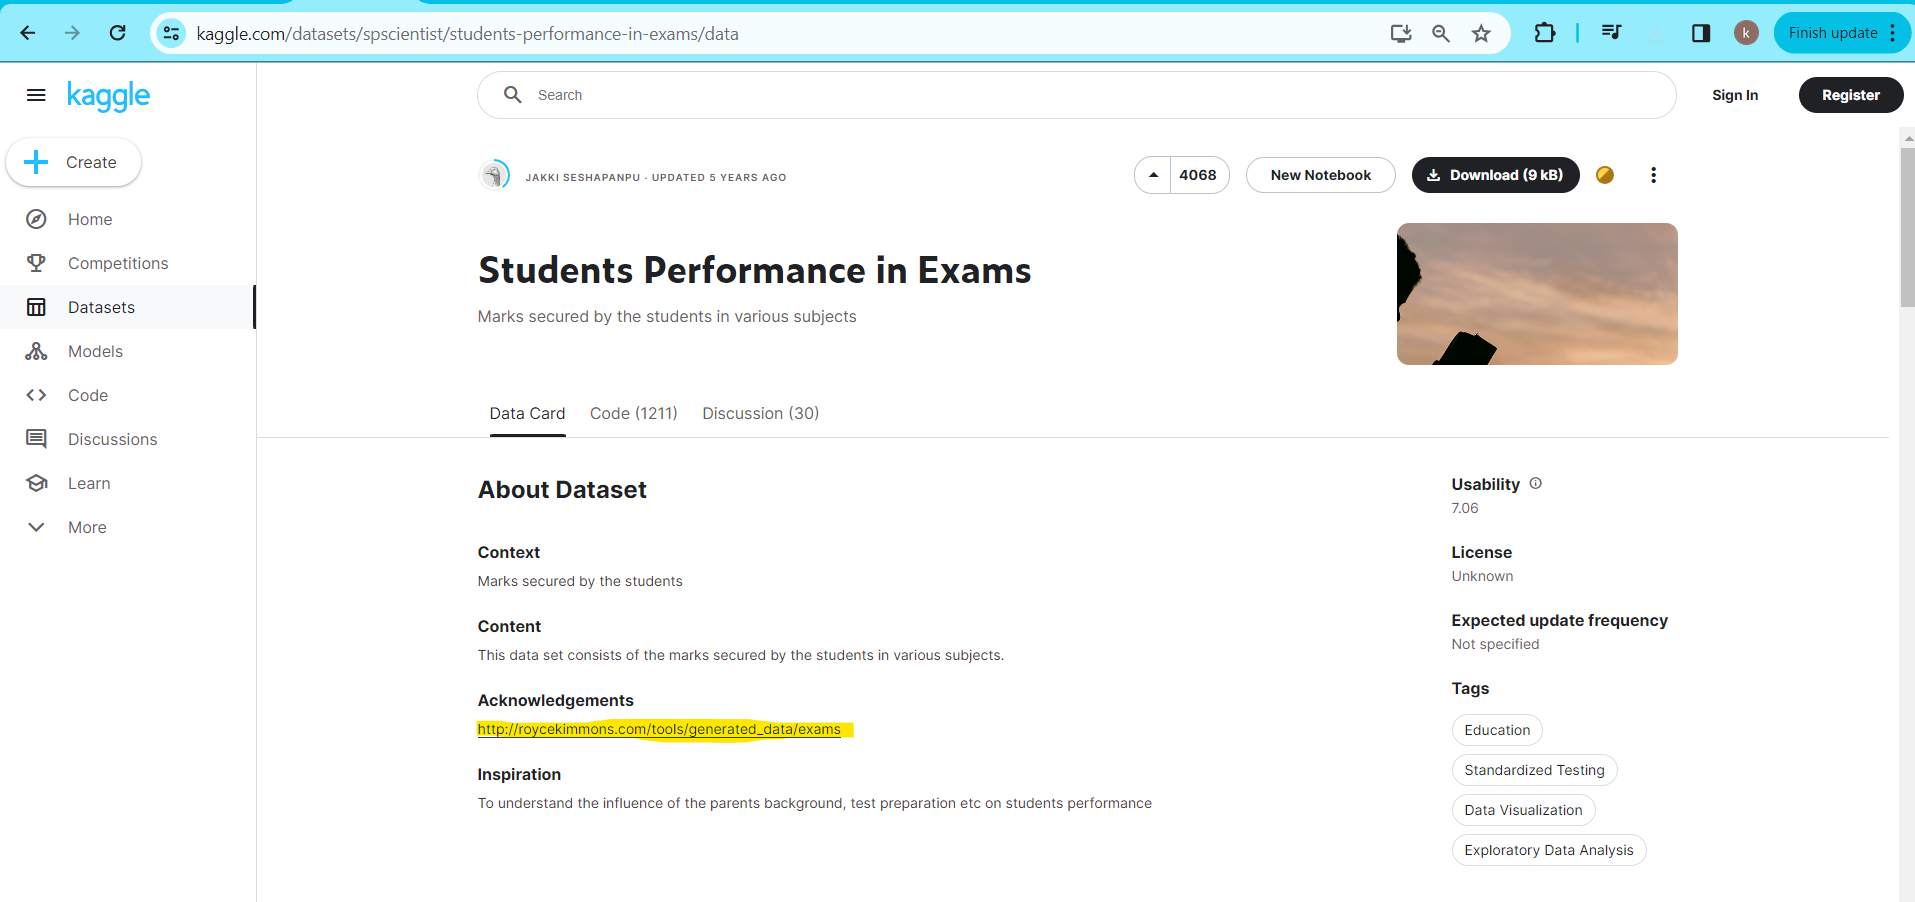

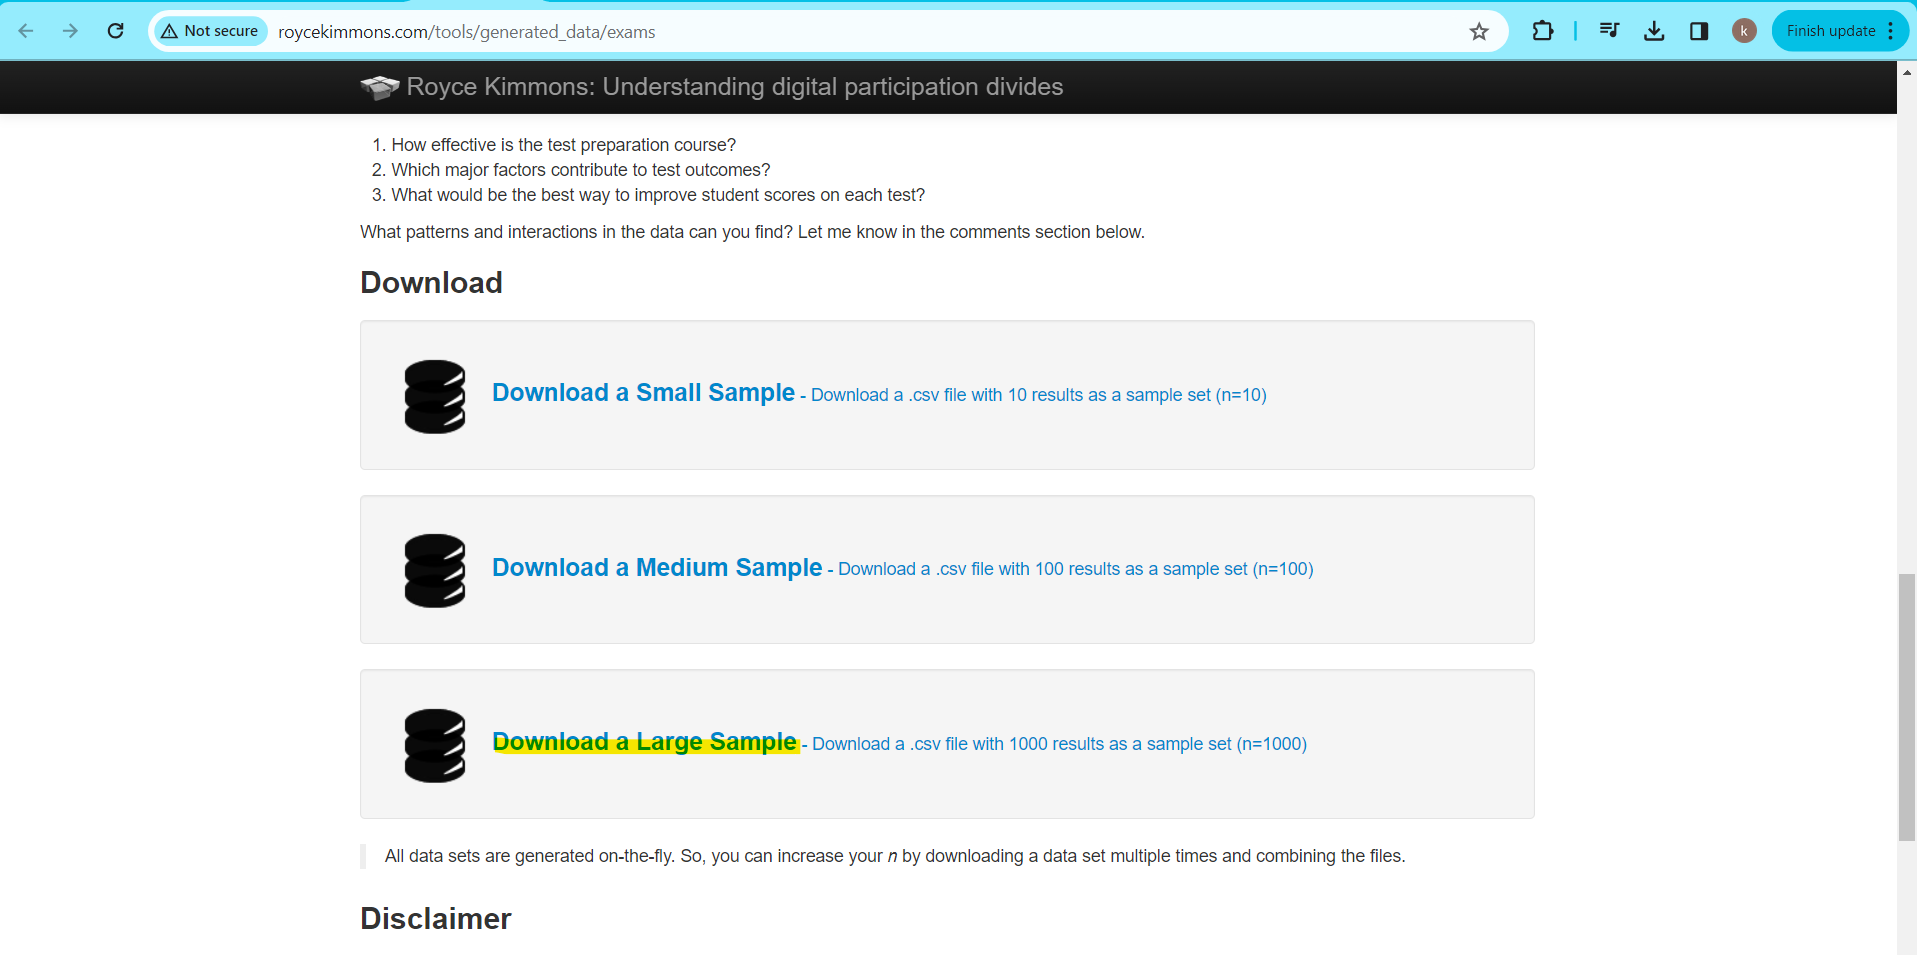

In [2]:
pd.read_csv("exams.csv")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group D,some college,free/reduced,completed,77,78,74
1,male,group D,high school,standard,completed,93,85,85
2,female,group D,some college,standard,none,70,73,68
3,female,group C,high school,free/reduced,completed,82,89,94
4,female,group D,bachelor's degree,standard,none,84,88,87
...,...,...,...,...,...,...,...,...
995,male,group D,associate's degree,standard,none,79,78,76
996,female,group D,high school,standard,completed,74,93,88
997,female,group D,some college,standard,none,83,91,86
998,male,group E,bachelor's degree,standard,none,86,91,81


In [3]:
df=pd.read_csv("exams.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group D,some college,free/reduced,completed,77,78,74
1,male,group D,high school,standard,completed,93,85,85
2,female,group D,some college,standard,none,70,73,68
3,female,group C,high school,free/reduced,completed,82,89,94
4,female,group D,bachelor's degree,standard,none,84,88,87


In [5]:
for i in df.columns:
    print("Unique values of column: "+i)
    print(df[i].unique())
    print("****************************")

Unique values of column: gender
['male' 'female']
****************************
Unique values of column: race/ethnicity
['group D' 'group C' 'group B' 'group E' 'group A']
****************************
Unique values of column: parental level of education
['some college' 'high school' "bachelor's degree" "associate's degree"
 'some high school' "master's degree"]
****************************
Unique values of column: lunch
['free/reduced' 'standard']
****************************
Unique values of column: test preparation course
['completed' 'none']
****************************
Unique values of column: math score
[ 77  93  70  82  84  25  61  66  58  59  98  79  72  83  55  57  65  60
  56  75  49  50  63  68  42  51  97 100  69  64  19  73  62  76  44  38
  78  92  91  53  48  45  47  89  74  67  34  71  96  81  86  87  80  40
  54  90  46  52  22  85  43  95  26  41  88  94  36  35  37  28  33  18
  10  29  39  32]
****************************
Unique values of column: reading score
[ 78  8

In [6]:
df.shape

(1000, 8)

In [7]:
df.describe()

# Works on numerical features

,math score,reading score,writing score
count,1000.000000,1000.0000,1000.000000
mean,67.265000,70.3660,69.153000
std,15.221119,14.7442,15.225354
min,10.000000,14.0000,7.000000
25%,57.000000,60.0000,58.000000
50%,68.000000,71.0000,70.000000
75%,78.000000,81.0000,80.000000
max,100.000000,100.0000,100.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
# Seperating the categprical columns and numerical columns

df["lunch"].dtypes

dtype('O')

In [10]:
df["reading score"].dtypes

dtype('int64')

In [11]:
categorical_features=[]
numerical_features=[]
for i in df.columns:
    if df[i].dtypes=="O":
        categorical_features.append(i)
    else:
        numerical_features.append(i)

In [12]:
categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [13]:
numerical_features

['math score', 'reading score', 'writing score']

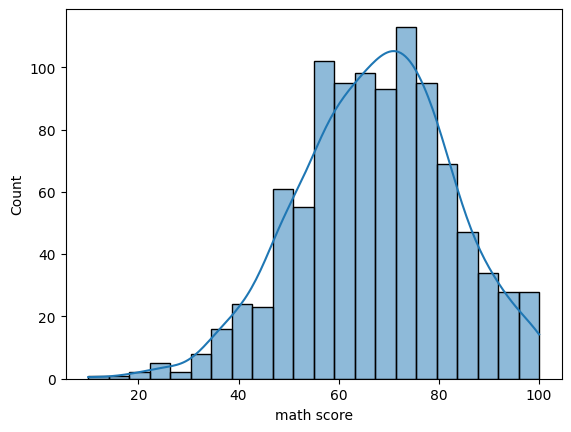

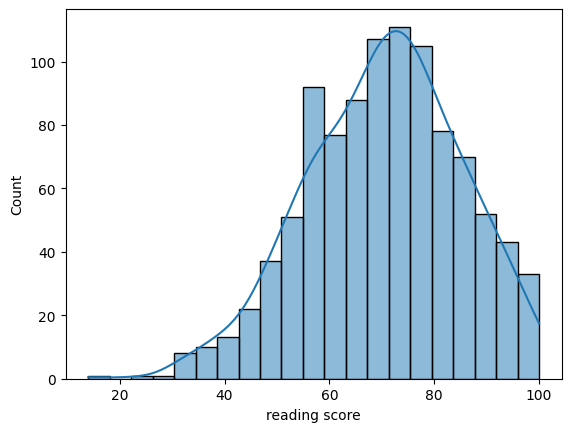

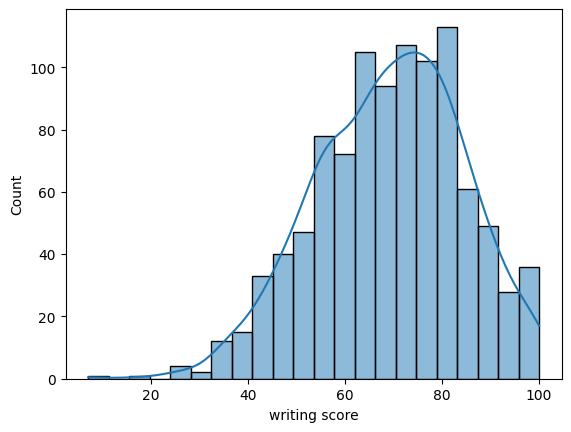

In [14]:
# Distribution of numerical data

for i in numerical_features:
    sns.histplot(df[i],kde=True)
    plt.show()

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column


In [15]:
# Check missing values

df.isna()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [16]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Our Insights or Observation:

No null values present 

In [17]:
## Check Duplicates

df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [18]:
df.duplicated().sum()

1

In [19]:
df[df.duplicated()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
827,female,group C,associate's degree,standard,none,75,81,86


In [20]:
# Dropping duplicates

df.drop_duplicates(inplace=True)

In [21]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group D,some college,free/reduced,completed,77,78,74
1,male,group D,high school,standard,completed,93,85,85
2,female,group D,some college,standard,none,70,73,68
3,female,group C,high school,free/reduced,completed,82,89,94
4,female,group D,bachelor's degree,standard,none,84,88,87
...,...,...,...,...,...,...,...,...
995,male,group D,associate's degree,standard,none,79,78,76
996,female,group D,high school,standard,completed,74,93,88
997,female,group D,some college,standard,none,83,91,86
998,male,group E,bachelor's degree,standard,none,86,91,81


In [22]:
df.duplicated().sum()

0

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       999 non-null    object
 1   race/ethnicity               999 non-null    object
 2   parental level of education  999 non-null    object
 3   lunch                        999 non-null    object
 4   test preparation course      999 non-null    object
 5   math score                   999 non-null    int64 
 6   reading score                999 non-null    int64 
 7   writing score                999 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 70.2+ KB


In [24]:
## 3.1 Checking the number of uniques values of each columns

df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     76
reading score                  73
writing score                  75
dtype: int64

In [25]:
## Check the statistics of the dataset

df.describe()

,math score,reading score,writing score
count,999.000000,999.000000,999.000000
mean,67.257257,70.355355,69.136136
std,15.226772,14.747740,15.223633
min,10.000000,14.000000,7.000000
25%,57.000000,60.000000,58.000000
50%,68.000000,71.000000,70.000000
75%,78.000000,81.000000,80.000000
max,100.000000,100.000000,100.000000


## Insights or Observation (Important)

- From the above description of numerical data,all means are very close to each other- between 67.25 and 70.35
- All the standard deviation are also close- between 14.74- 15.22
- While there is a minimum of 10 for maths,other are having 7 and 14 value

In [26]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group D,some college,free/reduced,completed,77,78,74
1,male,group D,high school,standard,completed,93,85,85
2,female,group D,some college,standard,none,70,73,68
3,female,group C,high school,free/reduced,completed,82,89,94
4,female,group D,bachelor's degree,standard,none,84,88,87


In [27]:
# Seggregate the numerical and categorical columns

cat_features=[i for i in df.columns if df[i].dtype=="O"]
num_features=[i for i in df.columns if df[i].dtype!="O"]

In [28]:
cat_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [29]:
num_features

['math score', 'reading score', 'writing score']

In [30]:
# Let's try to create a new column to combine all the marks

df["total_marks"]=(df["math score"]+df["reading score"]+df["writing score"])

In [31]:
df["average_marks"]=df["total_marks"]/3

In [32]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_marks,average_marks
0,male,group D,some college,free/reduced,completed,77,78,74,229,76.333333
1,male,group D,high school,standard,completed,93,85,85,263,87.666667
2,female,group D,some college,standard,none,70,73,68,211,70.333333
3,female,group C,high school,free/reduced,completed,82,89,94,265,88.333333
4,female,group D,bachelor's degree,standard,none,84,88,87,259,86.333333
...,...,...,...,...,...,...,...,...,...,...
995,male,group D,associate's degree,standard,none,79,78,76,233,77.666667
996,female,group D,high school,standard,completed,74,93,88,255,85.000000
997,female,group D,some college,standard,none,83,91,86,260,86.666667
998,male,group E,bachelor's degree,standard,none,86,91,81,258,86.000000


<Axes: xlabel='average_marks', ylabel='Count'>

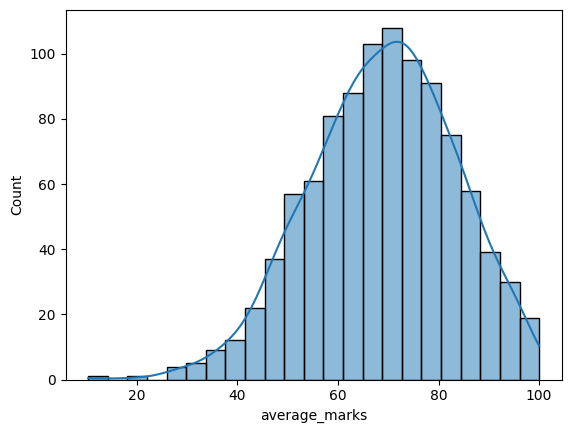

In [33]:
# Visualize the distribution of the average_marks column

sns.histplot(df["average_marks"],kde=True)

# Looks like negative skewed or left skewed

<Axes: xlabel='average_marks', ylabel='Count'>

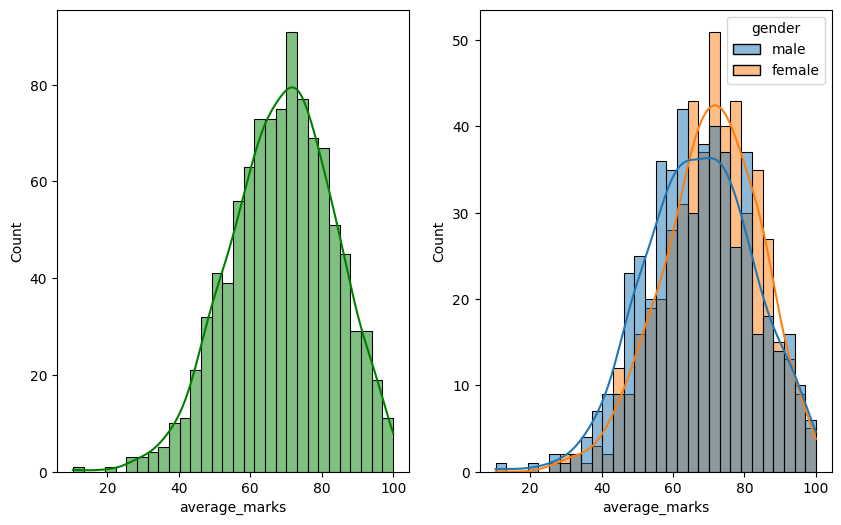

In [34]:
# Explore more visualizations

fig,ax=plt.subplots(1,2,figsize=(10,6))
plt.subplot(121)# It will represent the 1st row and 1st column
sns.histplot(df["average_marks"],kde=True,bins=30,color="g")
plt.subplot(122)# It will represent the 1st row and 2nd column
sns.histplot(x="average_marks",data=df,kde=True,bins=30,hue="gender")

## Insights

- Female student tend to perform well than male students

In the code snippet you provided, plt.subplots(1, 2, figsize=(10, 6)) creates a 1x3 grid of subplots, and the numbers 121, 122, and 123 refer to the position of each subplot within that grid. The format is a three-digit integer, where the first digit is the number of rows, the second digit is the number of columns, and the third digit is the index of the current subplot.

## Let's find the relationship of average marks with lunch

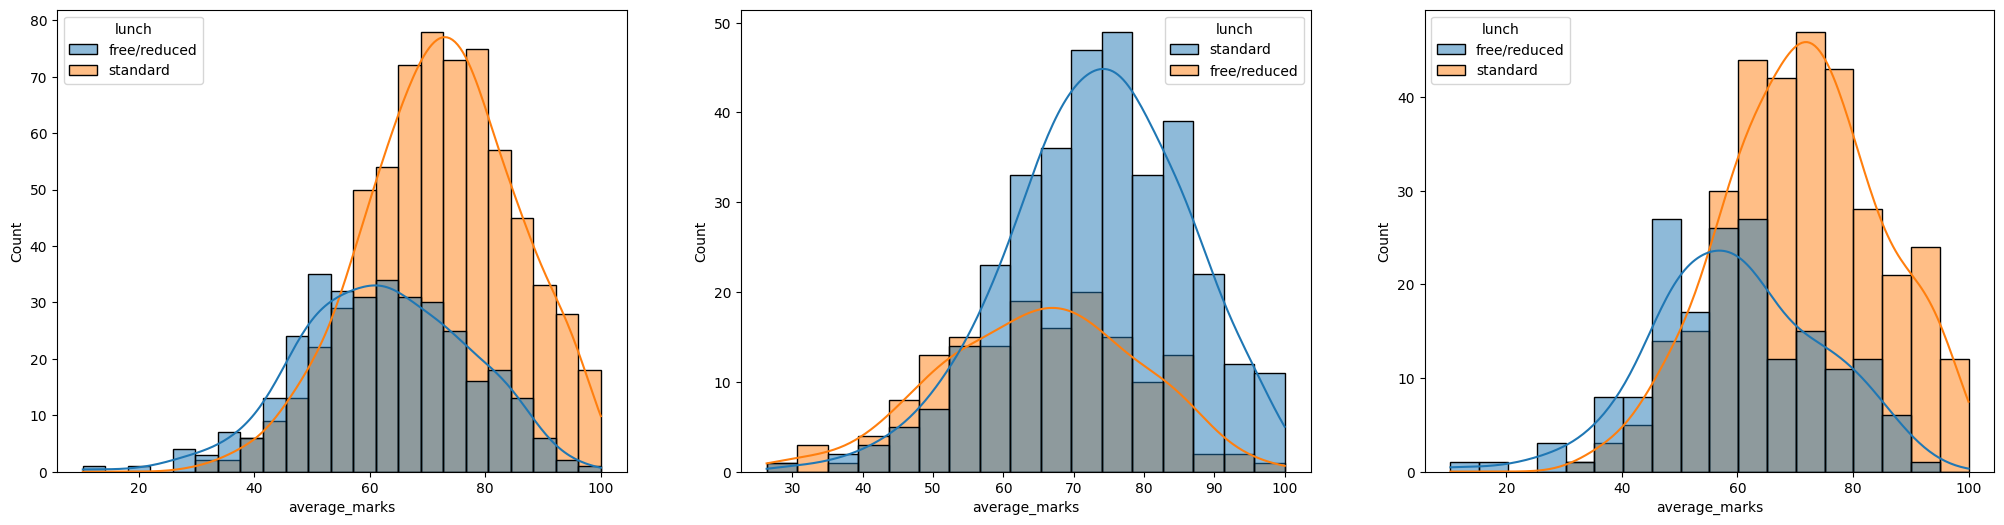

In [35]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average_marks',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average_marks',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average_marks',kde=True,hue='lunch')
plt.show()

## Insights

- Standard Lunch help students perform well in exams
- Standard lunch helps perform well in exams be it a male or female

In the code snippet you provided, plt.subplots(1, 3, figsize=(25, 6)) creates a 1x3 grid of subplots, and the numbers 131, 132, and 133 refer to the position of each subplot within that grid. The format is a three-digit integer, where the first digit is the number of rows, the second digit is the number of columns, and the third digit is the index of the current subplot.

In your case:

plt.subplot(131) means the first subplot in a 1x3 grid.

plt.subplot(132) means the second subplot in a 1x3 grid.

plt.subplot(133) means the third subplot in a 1x3 grid.
Here's a breakdown of the parameters:

The first digit (1) is the number of rows in the grid.
The second digit (3) is the number of columns in the grid.
The third digit (1, 2, 3) is the index of the current subplot.

## Let's find the relationship of average marks with parental level of education

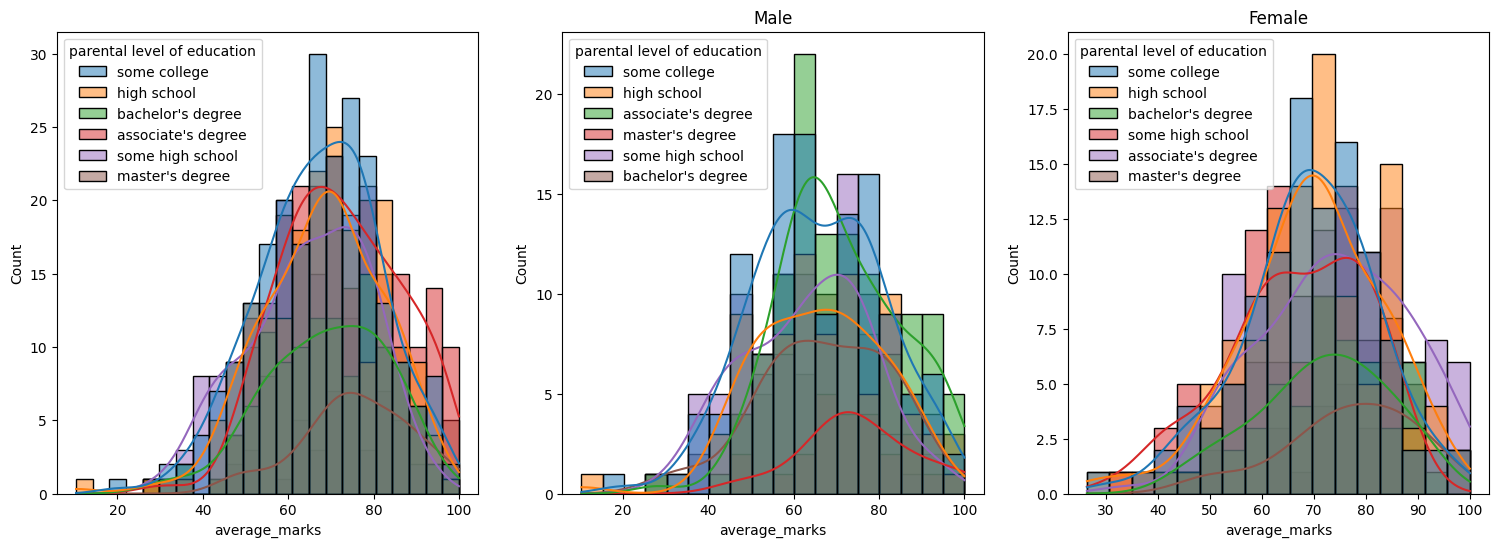

In [36]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_marks',kde=True,hue='parental level of education')
plt.subplot(142)
plt.title("Male")
ax =sns.histplot(data=df[df.gender=='male'],x='average_marks',kde=True,hue='parental level of education')
plt.subplot(143)
plt.title("Female")
ax =sns.histplot(data=df[df.gender=='female'],x='average_marks',kde=True,hue='parental level of education')
plt.show()

#### Insights
- In general parent's education don't help student perform well in exam.( all are having average in between 60 to 80)
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam (the data is left skewed for associate's and master's degree, as we know the mean for left skewed is greater as compared to right skewed and normal distribution)
- 3rd plot we can see there is no effect of parent's education on female students.( Here for all the distributions mean is in between 65 to 80)

# For the more detailed descriptive explanation see the below explanations: (Not covered in the PW Skills)

In [37]:
df[df["parental level of education"]=="high school"]["average_marks"].mean()

# 1st graph, mean for high school

68.16404886561953

In [38]:
# Tried to compute the average marks for gender== male 

df[(df.gender=="male") & (df["parental level of education"]=="master's degree")]["average_marks"].mean()

# see the 2nd graph for masters degree , calculated mean is matching

74.96296296296295

In [39]:
df[(df.gender=="female") & (df["parental level of education"]=="master's degree")]["average_marks"].mean()

# 3rd graph

76.88541666666667

In [40]:
# Let's do it in descriptive manner

# 1st graph

# Let's calculate the means for parental level of education features

a=df["parental level of education"].unique()
a

array(['some college', 'high school', "bachelor's degree",
       "associate's degree", 'some high school', "master's degree"],
      dtype=object)

In [41]:
for i in a:
    print("Mean for: "+i)
    print(df[df["parental level of education"]==i]["average_marks"].mean())

Mean for: some college
67.36194563662374
Mean for: high school
68.16404886561953
Mean for: bachelor's degree
69.22777777777777
Mean for: associate's degree
72.3239875389408
Mean for: some high school
65.1849816849817
Mean for: master's degree
76.00564971751412


## Insights for 1st graph

All the means are around 65.18 to 76

In [42]:
# Let's do it in descriptive manner

# 2nd graph

# Let's calculate the means for parental level of education features

a=df["parental level of education"].unique()
a

array(['some college', 'high school', "bachelor's degree",
       "associate's degree", 'some high school', "master's degree"],
      dtype=object)

In [43]:
for i in a:
    print("Mean for: "+i)
    print(df[(df.gender=="male") & (df["parental level of education"]==i)]["average_marks"].mean())

Mean for: some college
65.84391534391536
Mean for: high school
66.0569105691057
Mean for: bachelor's degree
67.40579710144927
Mean for: associate's degree
70.97050147492625
Mean for: some high school
63.29166666666666
Mean for: master's degree
74.96296296296295


## Insights for 2nd graph

- As we can observe we have high average for the associates degree and the master's degree
- Mean is ranging from 63.29 to 74.96

In [44]:
# Let's do it in descriptive manner

# 3rd graph

# Let's calculate the means for parental level of education features

a=df["parental level of education"].unique()
a

array(['some college', 'high school', "bachelor's degree",
       "associate's degree", 'some high school', "master's degree"],
      dtype=object)

In [45]:
for i in a:
    print("Mean for: "+i)
    print(df[(df.gender=="female") & (df["parental level of education"]==i)]["average_marks"].mean())

Mean for: some college
69.14953271028038
Mean for: high school
69.74923547400611
Mean for: bachelor's degree
71.69281045751633
Mean for: associate's degree
73.83828382838284
Mean for: some high school
66.95744680851064
Mean for: master's degree
76.88541666666667


## Insights for 3rd graph

- As we can observe we have high average for the associates degree and the master's degree.
- Mean is ranges from 69.14 to 76.88

## Let's find the relationship of average marks with race/ethnicity feature

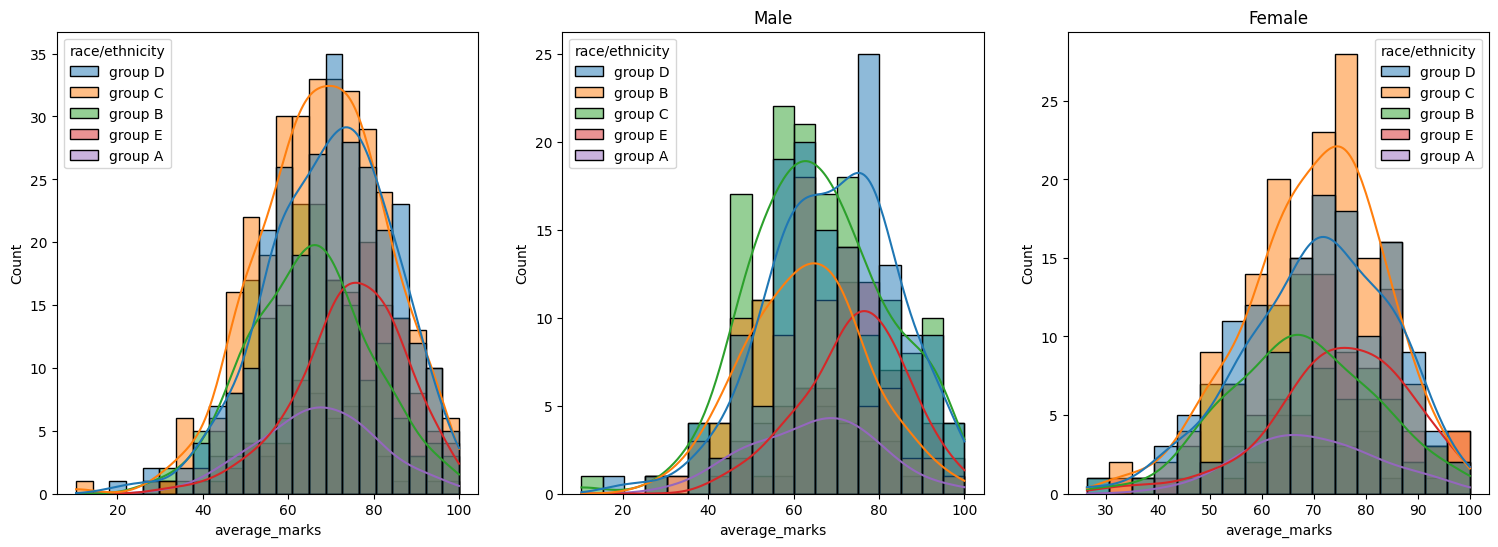

In [46]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_marks',kde=True,hue='race/ethnicity')
plt.subplot(142)
plt.title("Male")
ax =sns.histplot(data=df[df.gender=='male'],x='average_marks',kde=True,hue='race/ethnicity')
plt.subplot(143)
plt.title("Female")
ax =sns.histplot(data=df[df.gender=='female'],x='average_marks',kde=True,hue='race/ethnicity')
plt.show()

## Insights

- The people from Group C has highest average in all 3 figures

- Students of group A and group  tends to perform poorly in exam.(see the average, group A nd B has less average as compared to other groups)
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female (see the average)


In [47]:
## You can make the analyze by developing the descriptive analysis

In [48]:
## Let's plot the pair plot

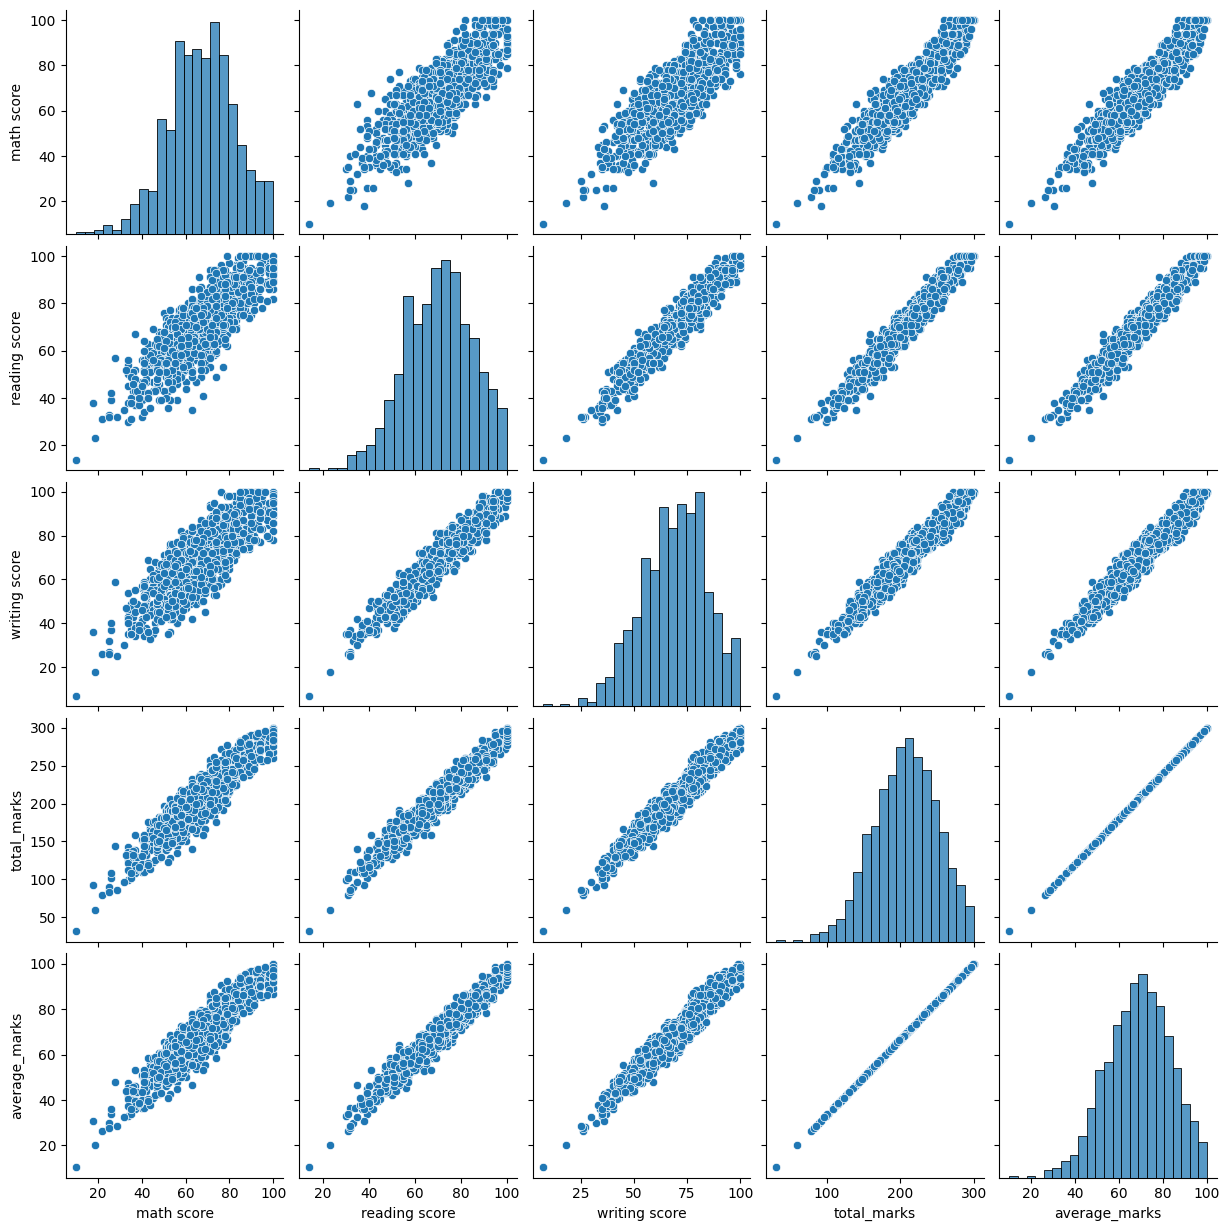

In [49]:
sns.pairplot(df)

# As we can observe all the features are positively correlated.(correlation ~0.8 to 1)
# Average_marks and total marks are perfectly positively correlated.(correlation value==1)

In [50]:
# we can find the correlation values using corr() for numerical features

df[["math score","reading score","writing score","total_marks","average_marks"]].corr()

,math score,reading score,writing score,total_marks,average_marks
math score,1.000000,0.818096,0.807657,0.919879,0.919879
reading score,0.818096,1.000000,0.955546,0.970170,0.970170
writing score,0.807657,0.955546,1.000000,0.966968,0.966968
total_marks,0.919879,0.970170,0.966968,1.000000,1.000000
average_marks,0.919879,0.970170,0.966968,1.000000,1.000000


<Axes: >

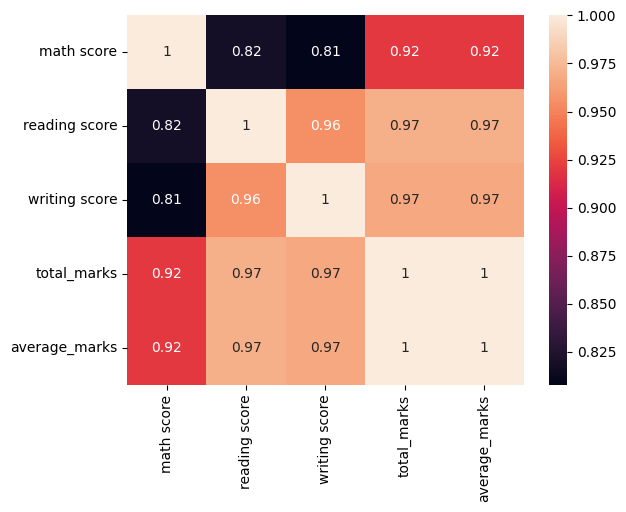

In [51]:
sns.heatmap(df[["math score","reading score","writing score","total_marks","average_marks"]].corr(),annot=True)

In [52]:
## Approx all features are important